In [1]:
from models.cifar_resnet import cifar_resnet
import torch
from fed_df_data_loader.get_crops_dataloader import get_distill_imgloader
from strategy.tools.clustering import cluster_embeddings, prune_clusters, calculate_tsne, visualise_tsne
from pathlib import Path


In [2]:

data_path = Path.joinpath(Path('./data'),'single_img_crops','crops')
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
cresnet8 = cifar_resnet(variant=8).to(torch.device('cuda'))    
print(f'model initialised')

train_set = get_distill_imgloader(path_to_crops=data_path, batch_size=1024)
print('distillation image loader loaded')
print(f'length of dataset : {len(train_set.dataset)}')

n_clusters=10
cluster_df,score = cluster_embeddings(train_set, model=cresnet8, device=device, n_clusters=n_clusters, seed=42)
print(f'Clustering done, cluster score : {score}')
print(f'Length of clustered df : {len(cluster_df)}')

pruned_df = prune_clusters(cluster_df, n_crops=3000, heuristic="easy")
print(f"Pruning done")

tsne_df = calculate_tsne(cluster_df=pruned_df, device=device, n_cpu=12)
print("tsne calculated")


model initialised
distillation image loader loaded
length of dataset : 49920
Clustering done, cluster score : 10778.609375
Length of clustered df : 49920
Pruning done
tsne calculated


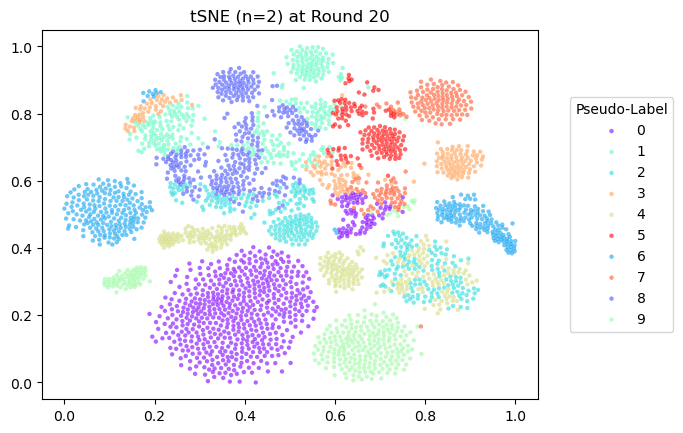

In [3]:
with open('test_tsne.png','wb') as f:
    visualise_tsne(tsne_df=tsne_df, out_file=f,round_no=20)